In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import pyLDAvis.lda_model
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.models.ldamodel import LdaModel

In [16]:
location = "github_doc_with_lot_of_information.csv"

df = pd.read_csv(location)
print(df.columns)
df["repo_name"]

Index(['repo_name', 'number_of_stars', 'descriptions', 'project_date',
       'project_size', 'project_lang', 'last_updated', '#_of_fork',
       '#_open_issue', 'project_score', '#_of_watcher', 'num_contributors',
       'num_releases', 'Total Versions', 'Total Contributors',
       'len_contributors_url', 'len_subscribers_url', 'len_git_commits_url',
       'len_comments_url', 'len_issue_comment_url', 'len_downloads_url',
       'len_issues_url', 'len_pulls_url', 'network_count',
       'subscribers_count'],
      dtype='object')


0                  cookiecutter/cookiecutter
1     tiangolo/full-stack-fastapi-postgresql
2           cookiecutter/cookiecutter-django
3       drivendata/cookiecutter-data-science
4      cookiecutter-flask/cookiecutter-flask
                       ...                  
95          iknite/cookiecutter-ansible-role
96     artemnovichkov/swift-project-template
97           wdm0006/cookiecutter-pipproject
98                     better-go/go-template
99            orctom/gradle-archetype-plugin
Name: repo_name, Length: 100, dtype: object

In [ ]:
#df = dfs[dfs["repo_name"].isin(['cookiecutter/cookiecutter', 'tiangolo/full-stack-fastapi-postgresql', 'cookiecutter-flask/cookiecutter-flask', 'drivendata/cookiecutter-data-science'])]

df = df.dropna(subset=['descriptions'])

# Function to remove emails and URLs
def remove_emails_and_urls(text):
    # Remove emails
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    return text

# Apply the function to remove emails and URLs
df["descriptions"] = df["descriptions"].apply(remove_emails_and_urls)

# Lowercasing
df["descriptions"] = df["descriptions"].str.lower()

# Remove Punctuation
df["descriptions"] = df["descriptions"].str.replace('[^\w\s]', '')

# Remove Stopwords
stop_words = set(stopwords.words('english'))
df["descriptions"] = df["descriptions"].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

# Lemmatization
lemmatizer = WordNetLemmatizer()
df["descriptions"] = df["descriptions"].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

# Replace underscores with spaces and remove "githubcom"
df["descriptions"] = df["descriptions"].str.replace('_', ' ')
df["descriptions"] = df["descriptions"].str.replace('githubcom', '')
df["descriptions"] = df["descriptions"].str.replace('github', '')
df["descriptions"] = df["descriptions"].str.replace('github.com', '')
df["descriptions"] = df["descriptions"].str.replace('jupyter', '')
df["descriptions"] = df["descriptions"].str.replace('python3', '')

# Optional: Remove extra spaces
df["descriptions"] = df["descriptions"].str.strip()

# Display the processed commit messages
description = df["descriptions"]

In [ ]:
description

In [ ]:
# Fine-tune your topic representations
representation_model = KeyBERTInspired()
topic_model = BERTopic(representation_model=representation_model)
topics, probs = topic_model.fit_transform(description)

# Get the document info
document_info = topic_model.get_document_info(description)

# Display the distribution of topics
topic_distribution = document_info['Topic'].value_counts()
print("Topic Distribution:")
topic_distribution

In [ ]:
document_info

In [ ]:
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired

# Assuming 'description' is a Series containing project descriptions in your DataFrame

# Fine-tune your topic representations
representation_model = KeyBERTInspired()

# Create and fit the BERTopic model
topic_model = BERTopic(representation_model=representation_model)
topics, _ = topic_model.fit_transform(description)

# Get the main topics without values
main_topics = topic_model.get_topic_freq().sort_values(by='Count', ascending=False)

# Display the main topics
print("Main Topics:")
main_topics


In [ ]:
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired

# Assuming 'description' is a Series containing project descriptions in your DataFrame

# Fine-tune your topic representations
representation_model = KeyBERTInspired()

# Create and fit the BERTopic model
topic_model = BERTopic(representation_model=representation_model)
topics, _ = topic_model.fit_transform(description)

# Get the main topics with associated terms
main_topics = topic_model.get_topics()

# Display the main topics
print("Main Topics:")
print(main_topics)


In [ ]:
import matplotlib.pyplot as plt

topics = {
    0: [
        ('cookiecutter', 0.7133925), ('django', 0.37551618), ('template', 0.3150288),
        ('flask', 0.30759245), ('python', 0.29160243), ('pytest', 0.2291236),
        ('templatebased', 0.22695366), ('framework', 0.1899183), ('sqlalchemy', 0.18877077),
        ('pythoncentric', 0.18684421)
    ],
    1: [
        ('flask', 0.45342195), ('django', 0.3989575), ('docker', 0.36196554),
        ('template', 0.36134502), ('boilerplate', 0.35451716), ('stack', 0.35379234),
        ('web', 0.33970731), ('application', 0.33562636), ('python', 0.3086812),
        ('fork', 0.28757334)
    ]
}

# Plotting the bar chart for each topic
for topic_id, keywords in topics.items():
    keywords, probabilities = zip(*keywords)
    
    plt.figure(figsize=(10, 5))
    plt.barh(keywords, probabilities, color='skyblue')
    plt.xlabel('Probability')
    plt.title(f'Topic {topic_id}')
    plt.gca().invert_yaxis()  # To display the highest probability at the top
    plt.show()


In [ ]:
print("Main Topics:")
for topic_id, terms_with_weights in main_topics.items():
    terms = [term for term, weight in terms_with_weights]
    print(f"Topic {topic_id}: {', '.join(terms)}")

In [ ]:
import matplotlib.pyplot as plt

topics = {
    0: [
        ('cookiecutter', 0.7133925), ('django', 0.37551618), ('template', 0.3150288),
        ('flask', 0.30759245), ('python', 0.29160243), ('pytest', 0.2291236),
        ('templatebased', 0.22695366), ('framework', 0.1899183), ('sqlalchemy', 0.18877077),
        ('pythoncentric', 0.18684421)
    ],
    1: [
        ('flask', 0.45342195), ('django', 0.3989575), ('docker', 0.36196554),
        ('template', 0.36134502), ('boilerplate', 0.35451716), ('stack', 0.35379234),
        ('web', 0.33970731), ('application', 0.33562636), ('python', 0.3086812),
        ('fork', 0.28757334)
    ]
}

# Plotting the scatter plot for each topic
for topic_id, keywords in topics.items():
    keywords, probabilities = zip(*keywords)
    
    plt.figure(figsize=(10, 5))
    plt.scatter(keywords, [1] * len(keywords), s=[prob * 1000 for prob in probabilities], color='skyblue', alpha=0.5)
    plt.title(f'Topic {topic_id}')
    plt.xticks(rotation=45, ha='right')
    plt.yticks([])
    plt.show()


In [17]:
df.columns

Index(['repo_name', 'number_of_stars', 'descriptions', 'project_date',
       'project_size', 'project_lang', 'last_updated', '#_of_fork',
       '#_open_issue', 'project_score', '#_of_watcher', 'num_contributors',
       'num_releases', 'Total Versions', 'Total Contributors',
       'len_contributors_url', 'len_subscribers_url', 'len_git_commits_url',
       'len_comments_url', 'len_issue_comment_url', 'len_downloads_url',
       'len_issues_url', 'len_pulls_url', 'network_count',
       'subscribers_count'],
      dtype='object')

### Only the most popular metrics

In [21]:
from datetime import datetime, timezone

df["project_date"] = df["project_date"].dt.tz_convert("UTC")
current_datetime = datetime.now(timezone.utc)
df["project_age"] = current_datetime - df["project_date"]
df["close_time_difference"] = 

In [95]:
dat = "combined_issues.csv"
df1 = pd.read_csv(dat, encoding="utf-8")
df1

,repo_name,project_lang,issue_title,issue_body,issue_date,issue_status,issue_categories,issued_close_date
0,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Tuesday,### Update [pytz](https://pypi.org/projec...,2023-11-21T12:05:12Z,Open,update,2023-11-21T19:21:46.359143
1,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Monday,### Update [pytz](https://pypi.org/projec...,2023-11-20T12:05:11Z,Closed,update,2023-11-21T12:05:18Z
2,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Sunday,### Update [pytz](https://pypi.org/projec...,2023-11-19T12:05:28Z,Closed,update,2023-11-20T12:05:17Z
3,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Saturday,### Update [pytz](https://pypi.org/projec...,2023-11-18T12:05:10Z,Closed,update,2023-11-19T12:05:32Z
4,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Friday,### Update [pytz](https://pypi.org/projec...,2023-11-17T12:05:11Z,Closed,update,2023-11-18T12:05:15Z
...,...,...,...,...,...,...,...,...
23097,zillionare/python-project-wizard,Python,Unittest support,Multiple issues with this cookiecutter\r \r 1-...,2022-02-14T18:33:49Z,Closed,NaN,2022-02-15T00:34:02Z
23098,zillionare/python-project-wizard,Python,Fix Links In CONTRIBUTING.md,The conversion process from .rst -> .md caused...,2021-08-07T20:47:13Z,Closed,NaN,2021-08-07T20:50:51Z
23099,zillionare/python-project-wizard,Python,mkdocs colour toggle option,* Date you used Cookiecutter PyPackage: 15/6/2...,2021-06-15T09:48:46Z,Closed,NaN,2021-06-15T11:03:13Z
23100,zillionare/python-project-wizard,Python,Fix Tutorial link,NaN,2021-05-08T06:48:48Z,Closed,NaN,2021-06-01T18:36:33Z


In [100]:
import pandas as pd

df1["issue_date"] = df1["issue_date"].str.split("T").str[0] 
df1["issue_date"] = df1["issue_date"].str.replace("Z", "")

df1["issued_close_date"] = df1["issued_close_date"].str.split(".").str[0]
df1["issued_close_date"] = df1["issued_close_date"].str.replace("Z", "")

df1["difference"] = pd.to_datetime(df1["issued_close_date"]) - pd.to_datetime(df1["issue_date"])

In [101]:
df1

,repo_name,project_lang,issue_title,issue_body,issue_date,issue_status,issue_categories,issued_close_date,difference
0,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Tuesday,### Update [pytz](https://pypi.org/projec...,2023-11-21,Open,update,2023-11-21T19:21:46,0 days 19:21:46
1,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Monday,### Update [pytz](https://pypi.org/projec...,2023-11-20,Closed,update,2023-11-21T12:05:18,1 days 12:05:18
2,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Sunday,### Update [pytz](https://pypi.org/projec...,2023-11-19,Closed,update,2023-11-20T12:05:17,1 days 12:05:17
3,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Saturday,### Update [pytz](https://pypi.org/projec...,2023-11-18,Closed,update,2023-11-19T12:05:32,1 days 12:05:32
4,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Friday,### Update [pytz](https://pypi.org/projec...,2023-11-17,Closed,update,2023-11-18T12:05:15,1 days 12:05:15
...,...,...,...,...,...,...,...,...,...
23097,zillionare/python-project-wizard,Python,Unittest support,Multiple issues with this cookiecutter\r \r 1-...,2022-02-14,Closed,NaN,2022-02-15T00:34:02,1 days 00:34:02
23098,zillionare/python-project-wizard,Python,Fix Links In CONTRIBUTING.md,The conversion process from .rst -> .md caused...,2021-08-07,Closed,NaN,2021-08-07T20:50:51,0 days 20:50:51
23099,zillionare/python-project-wizard,Python,mkdocs colour toggle option,* Date you used Cookiecutter PyPackage: 15/6/2...,2021-06-15,Closed,NaN,2021-06-15T11:03:13,0 days 11:03:13
23100,zillionare/python-project-wizard,Python,Fix Tutorial link,NaN,2021-05-08,Closed,NaN,2021-06-01T18:36:33,24 days 18:36:33


In [102]:
import pandas as pd

# Assuming df1 is your DataFrame

# Extract date and time components and remove 'Z'
df1["issue_date"] = df1["issue_date"].str.split("T").str[0]
df1["issue_date"] = df1["issue_date"].str.replace("Z", "")

df1["issued_close_date"] = df1["issued_close_date"].str.split(".").str[0]
df1["issued_close_date"] = df1["issued_close_date"].str.replace("Z", "")

# Convert to datetime
df1["issue_date"] = pd.to_datetime(df1["issue_date"])
df1["issued_close_date"] = pd.to_datetime(df1["issued_close_date"])

# Calculate the difference in days
df1["difference_days"] = (df1["issued_close_date"] - df1["issue_date"]).dt.days


In [103]:
df1

,repo_name,project_lang,issue_title,issue_body,issue_date,issue_status,issue_categories,issued_close_date,difference,difference_days
0,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Tuesday,### Update [pytz](https://pypi.org/projec...,2023-11-21,Open,update,2023-11-21 19:21:46,0 days 19:21:46,0
1,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Monday,### Update [pytz](https://pypi.org/projec...,2023-11-20,Closed,update,2023-11-21 12:05:18,1 days 12:05:18,1
2,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Sunday,### Update [pytz](https://pypi.org/projec...,2023-11-19,Closed,update,2023-11-20 12:05:17,1 days 12:05:17,1
3,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Saturday,### Update [pytz](https://pypi.org/projec...,2023-11-18,Closed,update,2023-11-19 12:05:32,1 days 12:05:32,1
4,agconti/cookiecutter-django-rest,Python,Scheduled daily dependency update on Friday,### Update [pytz](https://pypi.org/projec...,2023-11-17,Closed,update,2023-11-18 12:05:15,1 days 12:05:15,1
...,...,...,...,...,...,...,...,...,...,...
23097,zillionare/python-project-wizard,Python,Unittest support,Multiple issues with this cookiecutter\r \r 1-...,2022-02-14,Closed,NaN,2022-02-15 00:34:02,1 days 00:34:02,1
23098,zillionare/python-project-wizard,Python,Fix Links In CONTRIBUTING.md,The conversion process from .rst -> .md caused...,2021-08-07,Closed,NaN,2021-08-07 20:50:51,0 days 20:50:51,0
23099,zillionare/python-project-wizard,Python,mkdocs colour toggle option,* Date you used Cookiecutter PyPackage: 15/6/2...,2021-06-15,Closed,NaN,2021-06-15 11:03:13,0 days 11:03:13,0
23100,zillionare/python-project-wizard,Python,Fix Tutorial link,NaN,2021-05-08,Closed,NaN,2021-06-01 18:36:33,24 days 18:36:33,24


In [119]:
grouped_df = df1.groupby('repo_name')['difference_days'].mean().reset_index()
grouped_df

,repo_name,difference_days
0,BrianPugh/python-template,1.086420
1,Buuntu/fastapi-react,161.519608
2,Frojd/Wagtail-Pipit,19.709335
3,Fueled/django-init,152.796117
4,Lolomgrofl/fastapi-genesis,1.034483
...,...,...
85,wemake-services/wemake-django-template,27.816825
86,wemake-services/wemake-python-package,21.995807
87,wildfish/wildfish-django-starter,497.125000
88,woltapp/wolt-python-package-cookiecutter,85.292683


In [120]:
#df["Total Contributors"]

In [121]:
import pandas as pd

df_subset = df[["repo_name", "Total Contributors"]]

# Merge based on the common column "repo_name"
merged_df = pd.merge(df_subset, grouped_df, on='repo_name', how='left')

# Display the merged DataFrame
merged_df

,repo_name,Total Contributors,difference_days
0,cookiecutter/cookiecutter,268,474.598677
1,tiangolo/full-stack-fastapi-postgresql,16,432.553640
2,cookiecutter/cookiecutter-django,353,63.571119
3,drivendata/cookiecutter-data-science,40,357.540230
4,cookiecutter-flask/cookiecutter-flask,62,8.788618
...,...,...,...
95,iknite/cookiecutter-ansible-role,5,0.000000
96,artemnovichkov/swift-project-template,5,416.583333
97,wdm0006/cookiecutter-pipproject,5,946.500000
98,better-go/go-template,4,333.400000


In [122]:
loc = "nnnnnnnnnnnnnfiles.csv"
df2 = pd.read_csv(loc)

df2_subset = df2[["repo_name", "Total Contributors"]]

# Merge based on the common column "repo_name"
merged_df = pd.merge(df2_subset, grouped_df, on='repo_name', how='left')

# Display the merged DataFrame
merged_df

,repo_name,Total Contributors,difference_days
0,agconti/cookiecutter-django-rest,19,6.835156
1,aio-libs/aiohttp-devtools,23,66.154822
2,aio-libs/create-aio-app,28,215.240223
3,artemnovichkov/swift-project-template,5,416.583333
4,arthurhenrique/cookiecutter-fastapi,4,9.342857
...,...,...,...
85,wemake-services/wemake-django-template,40,27.816825
86,wemake-services/wemake-python-package,14,21.995807
87,wildfish/wildfish-django-starter,7,497.125000
88,woltapp/wolt-python-package-cookiecutter,5,85.292683


In [125]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr

# Assuming merged_df is your DataFrame
# Drop NaN values before scaling
merged_df_cleaned = merged_df.dropna(subset=['Total Contributors', 'difference_days'])

# Scale the values to a 0 to 1 range
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(merged_df_cleaned[['Total Contributors', 'difference_days']])
scaled_df = pd.DataFrame(scaled_values, columns=['Total Contributors', 'difference_days'])

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(scaled_df["Total Contributors"], scaled_df["difference_days"])

# Format to four significant figures
formatted_correlation = format(correlation_coefficient, '.4f')
formatted_p_value = format(p_value, '.4f')

print(f"Pearson Correlation Coefficient: {formatted_correlation}")
print(f"P-value: {formatted_p_value}")


Pearson Correlation Coefficient: -0.0418
P-value: 0.6956


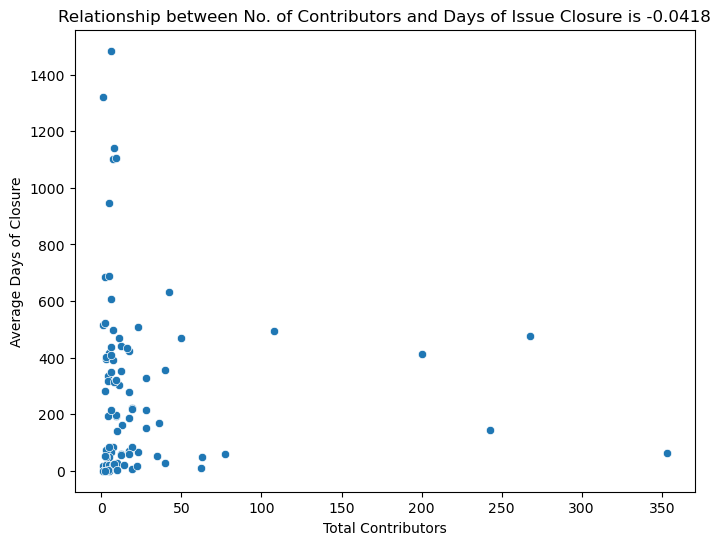

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Assuming merged_df is your DataFrame
# Drop NaN values before calculating the correlation
merged_df_cleaned = merged_df.dropna(subset=['Total Contributors', 'difference_days'])

# Calculate Pearson correlation coefficient
correlation_coefficient, _ = pearsonr(merged_df_cleaned["Total Contributors"], merged_df_cleaned["difference_days"])

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Total Contributors", y="difference_days", data=merged_df_cleaned)
plt.title(f'Relationship between No. of Contributors and Days of Issue Closure is {correlation_coefficient:.4f}')
plt.xlabel('Total Contributors')
plt.ylabel('Average Days of Closure')

# Show the plot
plt.show()

In [139]:
loc = "nnnnnnnnnnnnnfiles.csv"
df2 = pd.read_csv(loc)

df2["project_date"] = pd.to_datetime(df2["project_date"].str.split("T").str[0].str.replace("Z", ""))
df2["project_age"] = (datetime.now() - df2["project_date"]).dt.days

#df2["project_date"] = pd.to_datetime(df2["project_date"])
#df2["project_age"] = datetime.now() - df2["project_date"]

df2

,repo_name,total_issues,number_of_stars,descriptions,project_date,project_size,project_lang,last_updated,#_of_fork,#_open_issue,...,Total Versions,Total Contributors,len_contributors_url,len_subscribers_url,len_git_commits_url,len_comments_url,len_issue_comment_url,len_downloads_url,N_issues,project_age
0,agconti/cookiecutter-django-rest,121,1441,Build best practiced apis fast with Python3,2015-06-04,5041,Python,2023-10-23T11:10:01Z,188,6,...,8,19,74,73,79,79,86,71,121,3107
1,aio-libs/aiohttp-devtools,377,246,dev tools for aiohttp,2016-09-22,669,Python,2023-10-21T04:12:06Z,45,5,...,36,23,67,66,72,72,79,64,377,2631
2,aio-libs/create-aio-app,126,289,The boilerplate for aiohttp. Quick setup for y...,2018-09-21,1368,Python,2023-10-16T17:40:23Z,84,40,...,9,28,65,64,70,70,77,62,126,1902
3,artemnovichkov/swift-project-template,12,87,🍪 Easily generate Swift projects with Cookiecu...,2017-02-10,603,Swift,2023-05-31T10:43:28Z,17,1,...,0,5,79,78,84,84,91,76,12,2490
4,arthurhenrique/cookiecutter-fastapi,129,341,Cookiecutter template for FastAPI projects usi...,2020-01-12,512,Python,2023-10-22T17:19:55Z,51,7,...,5,4,77,76,82,82,89,74,129,1424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,wemake-services/wemake-django-template,1405,1830,Bleeding edge django template focused on code ...,2017-09-14,5492,Python,2023-10-23T18:02:08Z,207,38,...,3,40,80,79,85,85,92,77,1405,2274
86,wemake-services/wemake-python-package,476,393,Bleeding edge cookiecutter template to create ...,2018-10-16,1231,Python,2023-10-15T09:01:28Z,47,11,...,0,14,79,78,84,84,91,76,476,1877
87,wildfish/wildfish-django-starter,8,105,Django cookiecutter starter project template.,2013-03-04,191,Python,2023-06-10T22:18:40Z,15,3,...,0,7,74,73,79,79,86,71,8,3929
88,woltapp/wolt-python-package-cookiecutter,41,221,Cookiecutter for rapidly creating modern & hig...,2021-06-18,2030,Python,2023-10-22T19:16:06Z,41,13,...,0,5,82,81,87,87,94,79,41,901


In [140]:
days = df2[["Total Contributors", "project_age"]]

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(days[['Total Contributors', 'project_age']])
scaled_df = pd.DataFrame(scaled_values, columns=['Total Contributors', 'project_age'])

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(scaled_df["Total Contributors"], scaled_df["project_age"])

# Format to four significant figures
formatted_correlation = format(correlation_coefficient, '.4f')
formatted_p_value = format(p_value, '.4f')

print(f"Pearson Correlation Coefficient: {formatted_correlation}")
print(f"P-value: {formatted_p_value}")

Pearson Correlation Coefficient: 0.2315
P-value: 0.0281


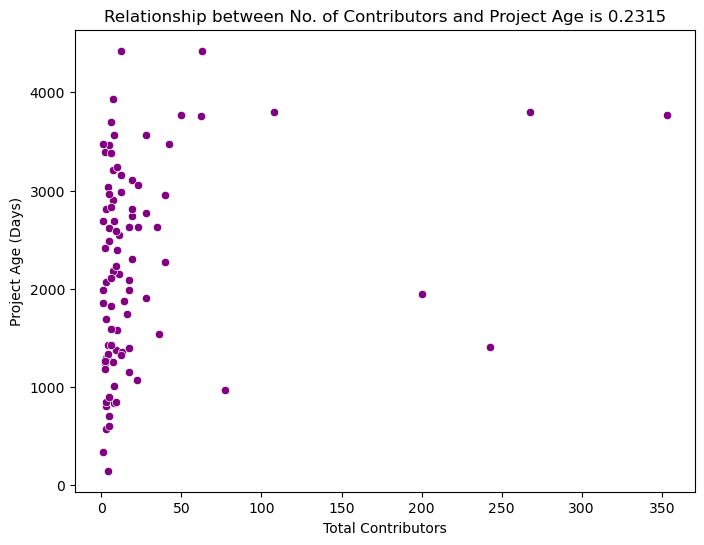

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Assuming df2 is your DataFrame
# Drop NaN values before calculating the correlation
df2_cleaned = df2.dropna(subset=['Total Contributors', 'project_age'])

# Calculate Pearson correlation coefficient
correlation_coefficient, _ = pearsonr(df2_cleaned["Total Contributors"], df2_cleaned["project_age"])

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Total Contributors", y="project_age", data=df2_cleaned, color="purple")
plt.title(f'Relationship between No. of Contributors and Project Age is {correlation_coefficient:.4f}')
plt.xlabel('Total Contributors')
plt.ylabel('Project Age (Days)')

# Show the plot
plt.show()
